# Sjekke ut pakken Sykefravær og sesongjustering

I denne notebooken har jeg bare testet litt for å se på sykefravær og sesongjusterte tall og sjekket litt for å få mer forståelse av de ulike funksjonene i RDemetra. 

In [1]:
library(PxWebApiData)
library(RJDemetra)

In [4]:
innData  <- ApiData(12439, Kjonn = "0", Sykefraver2 = "Alt", ContentsCode = "SykefravProsent", Tid = TRUE)
ujustert <- ts(innData$dataset$value, freq = 4, start = c(2000, 2)) ## Serien starter først 2. kvartal!

In [5]:
ujustert

,Qtr1,Qtr2,Qtr3,Qtr4
2000,,6.6,5.8,6.9
2001,7.5,6.7,6.1,7.2
2002,7.8,7.0,6.3,7.7
2003,8.0,7.5,6.7,8.2
2004,8.0,6.9,5.3,6.2
2005,6.8,6.1,5.3,6.5
2006,7.3,6.3,5.5,6.5
2007,7.2,6.1,5.5,6.6
2008,7.1,6.5,5.6,6.8
2009,7.4,6.7,6.2,7.1


In [48]:
x13_model <- x13(ujustert)

In [49]:
x13_model

RegARIMA
y = regression model + arima (0, 1, 1, 0, 1, 1)
Log-transformation: yes
Coefficients:
          Estimate Std. Error
Theta(1)   -0.3511      0.108
BTheta(1)  -0.5867      0.107

              Estimate Std. Error
LS (III-2004)  -0.1656      0.027
LS (I-2010)    -0.1348      0.027
TC (I-2021)    -0.1405      0.026
LS (I-2004)    -0.1070      0.027


Residual standard error: 0.03136 on 78 degrees of freedom
Log likelihood = 172.8, aic = -21.36 aicc = -19.91, bic(corrected for length) = -6.611



Decomposition
 Monitoring and Quality Assessment Statistics:  
      M stats
M(1)    0.039
M(2)    0.047
M(3)    0.676
M(4)    0.817
M(5)    0.659
M(6)    0.325
M(7)    0.117
M(8)    0.241
M(9)    0.197
M(10)   0.518
M(11)   0.518
Q       0.340
Q-M2    0.376

Final filters: 
Seasonal filter:  3x5
Trend filter:  5 terms Henderson moving average


Final
Last observed values
          y       sa        t         s         i
2021 Q4 7.0 6.781986 6.818852 1.0321460 0.9945935
2022 Q1 8.3 6.91415

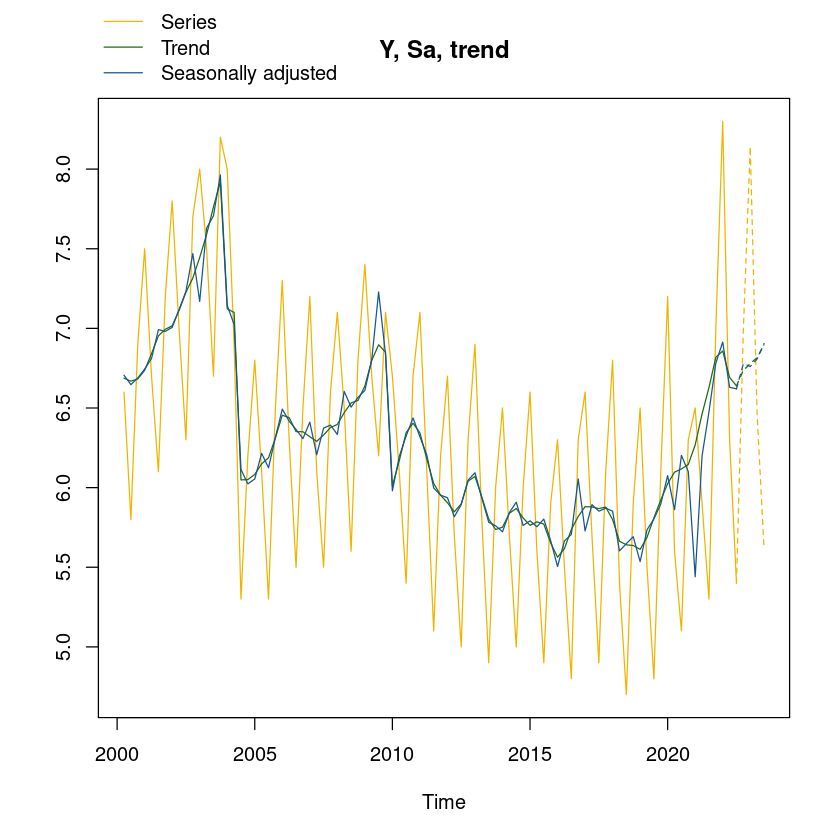

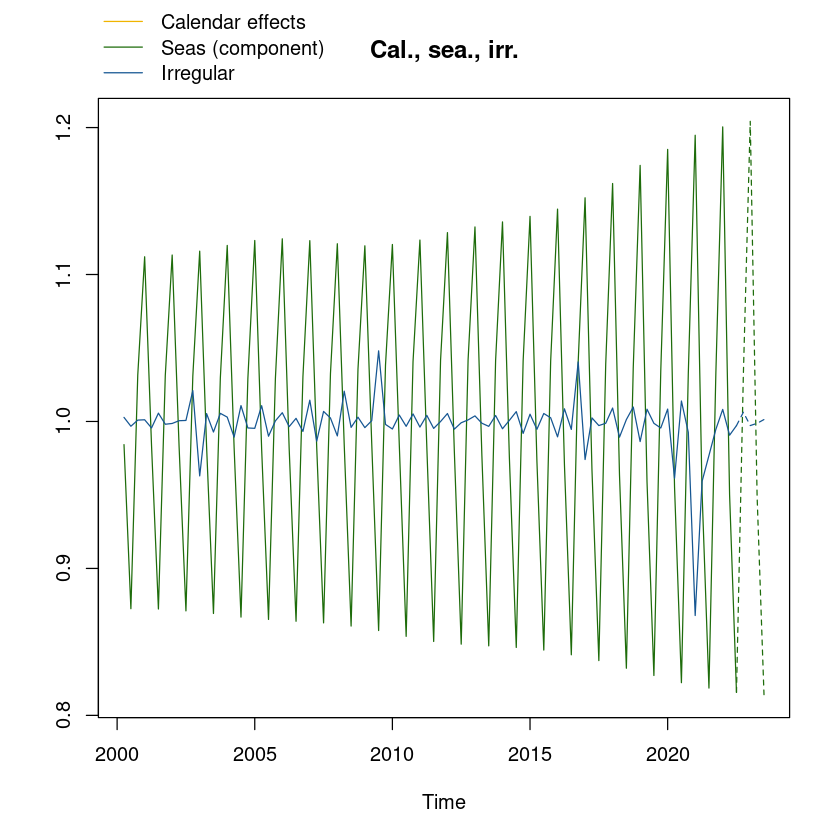

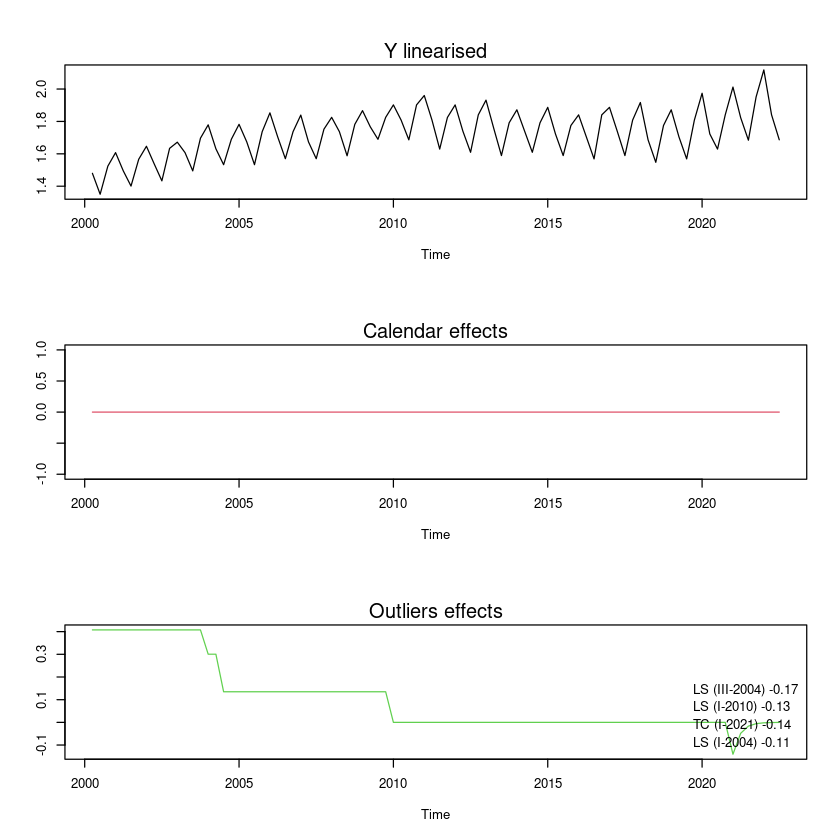

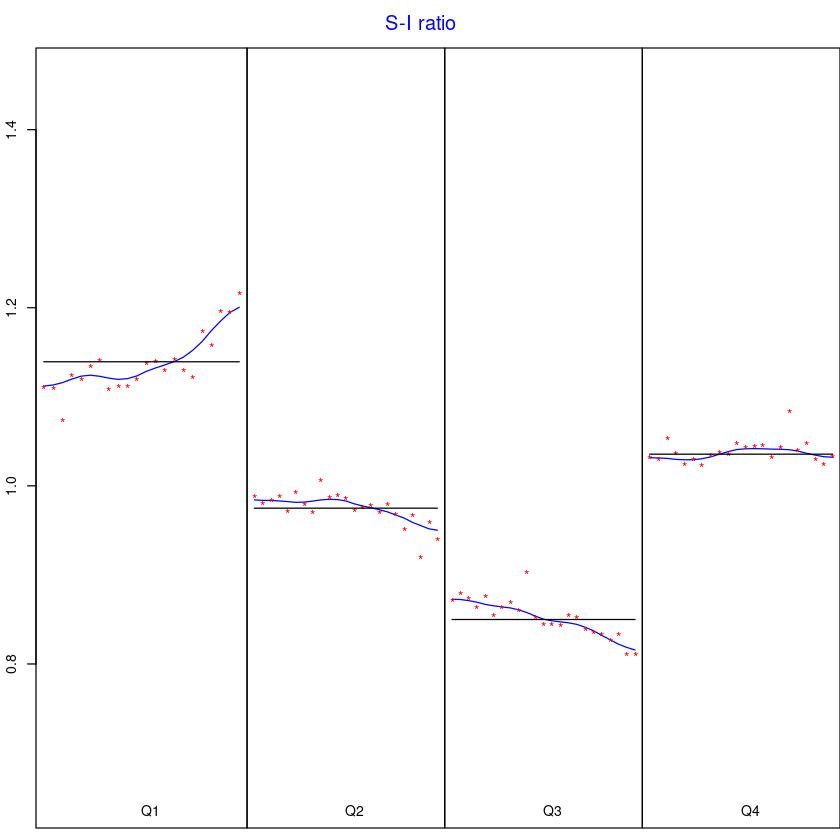

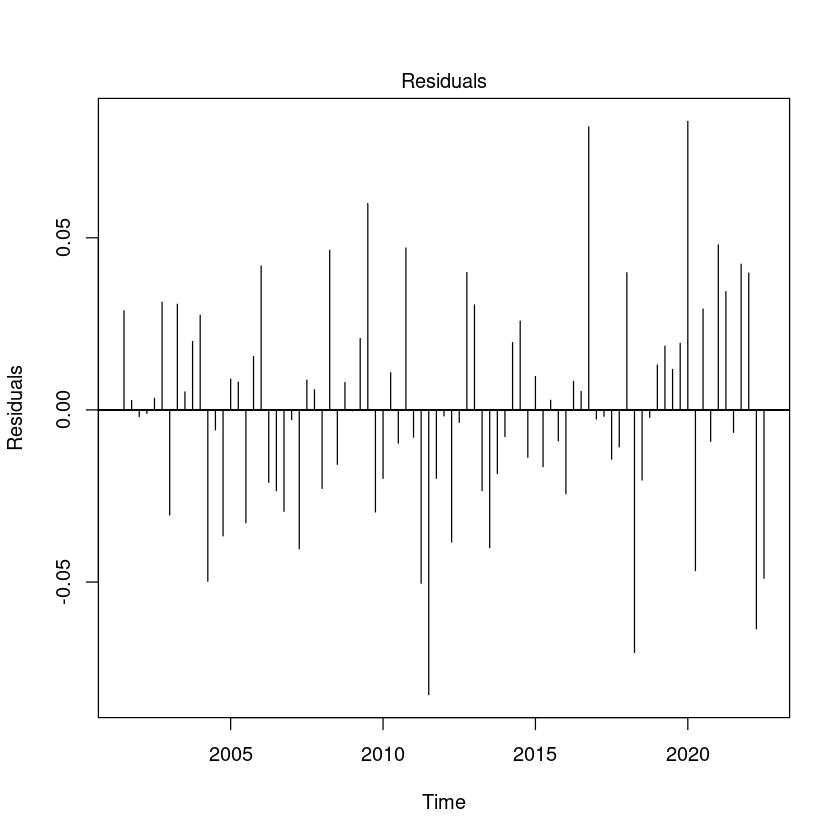

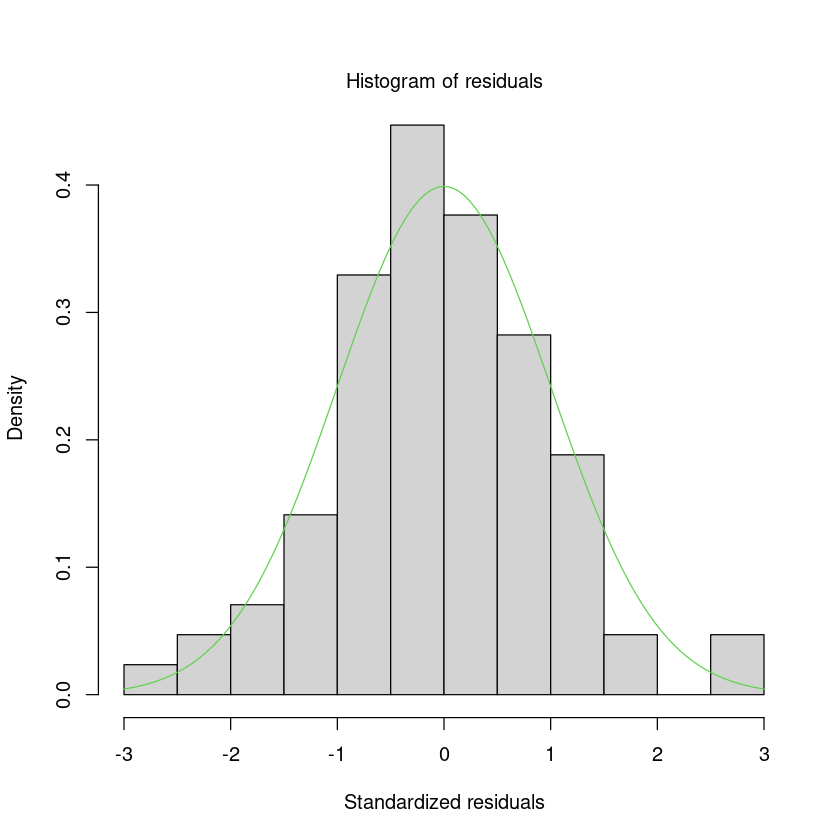

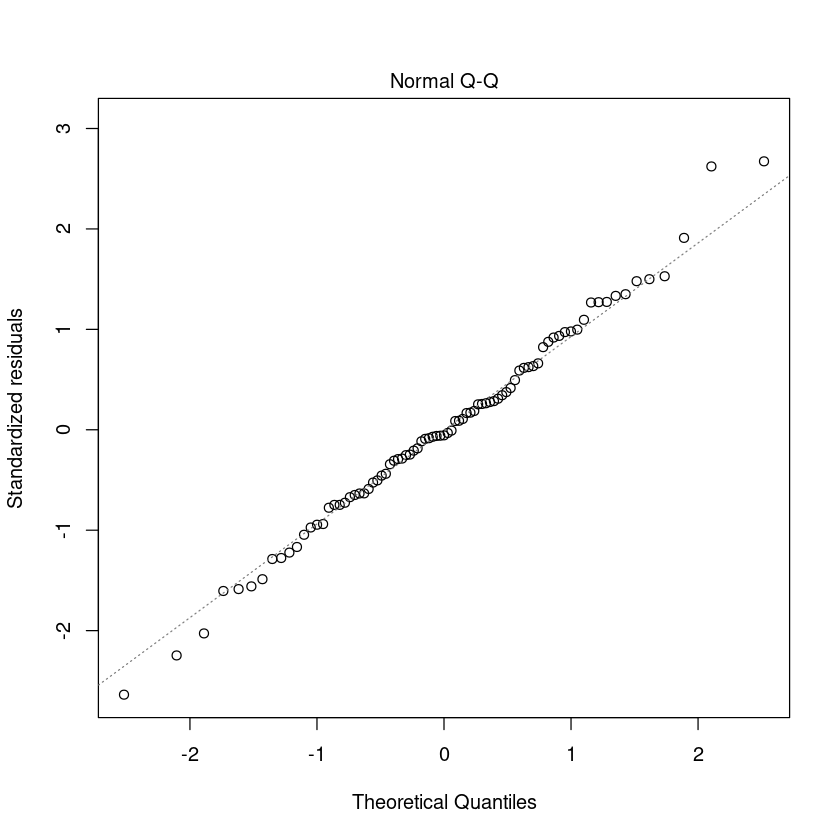

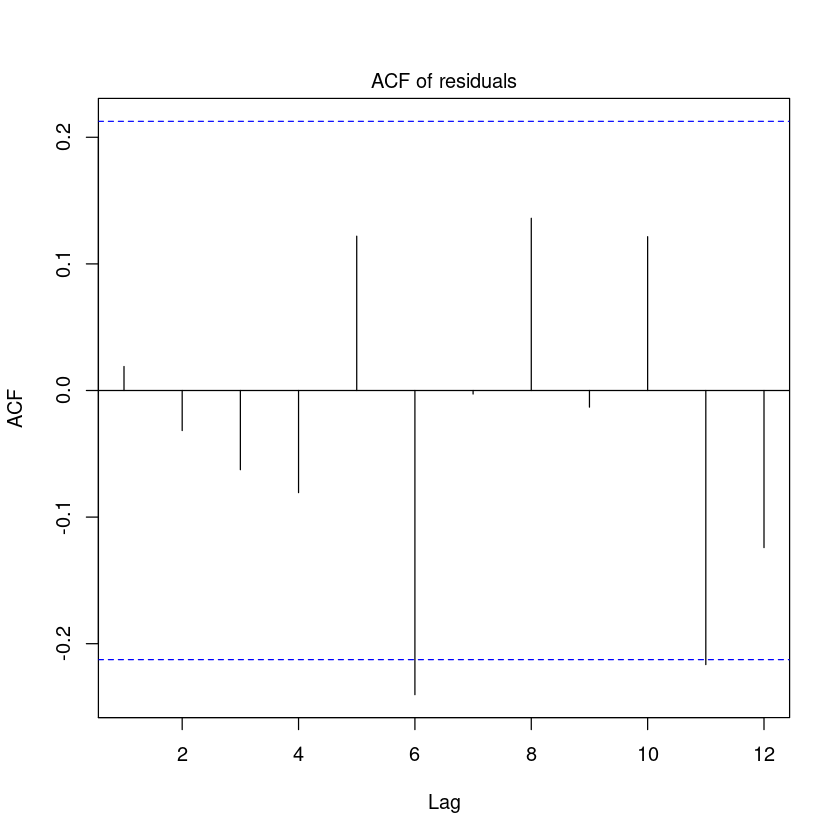

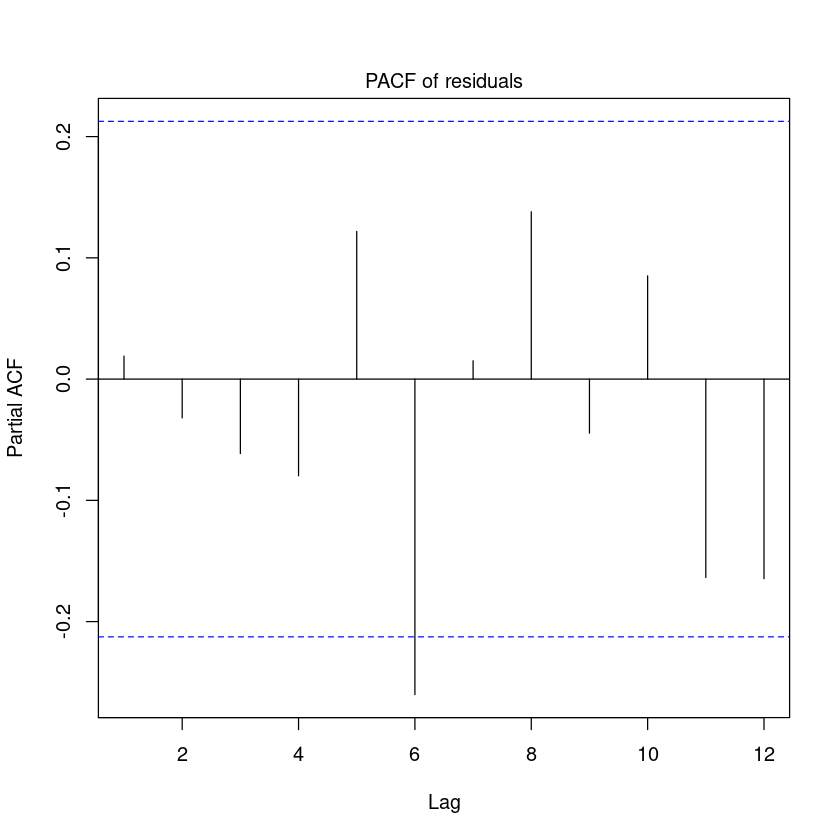

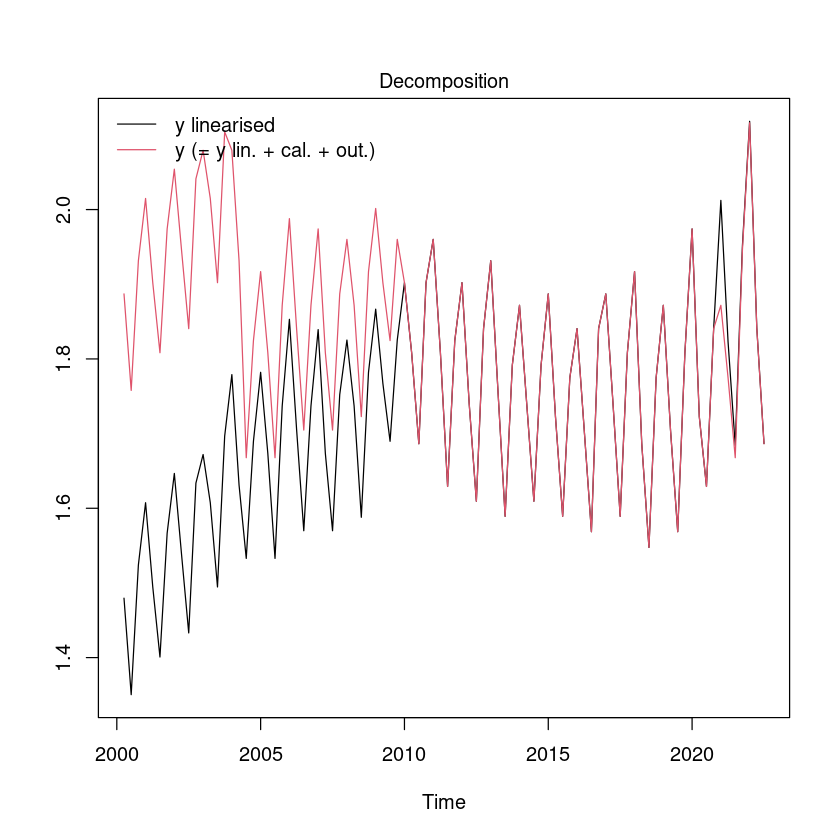

In [53]:
plot(x13_model, type_chart = c("sa-trend", "cal-seas-irr"))
plot(x13_model$regarima, which = 7)
plot(x13_model$decomposition)
plot(x13_model$regarima)